In [1]:
import pandas as pd
import glob

years = [2017,2018,2019,2020]
files = glob.glob('refined-data/*.csv')
data = {}

for year, file in zip(years, files):
    data[year] = pd.read_csv(file)

In [2]:
# universal_column_names = ['SR','DISTRICT','TALUKA','LOCATION','PH','EC','TDS','TH','CA','MG','NA','K','CO3','HCO3','CL','NO3','SO4','F','ALK','FE','SAR']

In [3]:
for i,df in enumerate(data.values()):
    print(f'Dataframe number {i}: ', df.columns.to_list())

Dataframe number 0:  ['S.No', 'District', 'Taluka', 'Location', 'pH', 'EC', 'TDS', 'TH', 'Ca', 'Mg', 'Na', 'K', 'CO3', 'HCO3', 'Cl', 'NO3', 'SO4', 'F', 'Alk', 'Fe']
Dataframe number 1:  ['Well No.', 'District', 'Taluka', 'Location', 'Date', 'pH', 'EC', 'TDS', 'CO3', 'HCO3', 'Cl', 'NO3', 'SO4', 'F', 'Alk', 'Ca', 'Mg', 'TH', 'Na', 'K', 'SAR']
Dataframe number 2:  ['District', 'Location', 'pH', 'EC', 'TDS', 'CO3', 'HCO3', 'Cl', 'NO3', 'S04', 'F', 'Alkalinity', 'Ca', 'Mg', 'TH', 'Na', 'K', 'SAR']
Dataframe number 3:  ['Sl.', 'District', 'Site', 'pH', 'EC', 'TDS', 'CO3', 'HCO3', 'Cl', 'NO3', 'SO4', 'F', ' Alk', 'Ca', 'Mg', 'TH', 'Na', 'K', 'SAR']


In [4]:
column_name_map = {
    'S.No':'ID',
    'Sl.':'ID',
    'District':'DISTRICT',
    'Taluka':'TALUKA',
    'Location':'LOCATION',
    'Alkalinity':'ALK',
    ' Alk':'ALK',
    'Alk':'ALK',
    'S04':'SO4',
    'Date':'DATE',
    'Well No.':'WELL NO.',
    'Site':'SITE',
    'pH':'PH',
    'Mg':'MG',
    'Ca':'CA',
    'Na':'NA',
    'Fe':'FE',
    'Cl':'CL',
}

for df in data.values():
    df.rename(columns=column_name_map, inplace=True)

In [5]:
for i,df in enumerate(data.values()):
    print(f'Dataframe number {i}: ', df.columns.to_list())

Dataframe number 0:  ['ID', 'DISTRICT', 'TALUKA', 'LOCATION', 'PH', 'EC', 'TDS', 'TH', 'CA', 'MG', 'NA', 'K', 'CO3', 'HCO3', 'CL', 'NO3', 'SO4', 'F', 'ALK', 'FE']
Dataframe number 1:  ['WELL NO.', 'DISTRICT', 'TALUKA', 'LOCATION', 'DATE', 'PH', 'EC', 'TDS', 'CO3', 'HCO3', 'CL', 'NO3', 'SO4', 'F', 'ALK', 'CA', 'MG', 'TH', 'NA', 'K', 'SAR']
Dataframe number 2:  ['DISTRICT', 'LOCATION', 'PH', 'EC', 'TDS', 'CO3', 'HCO3', 'CL', 'NO3', 'SO4', 'F', 'ALK', 'CA', 'MG', 'TH', 'NA', 'K', 'SAR']
Dataframe number 3:  ['ID', 'DISTRICT', 'SITE', 'PH', 'EC', 'TDS', 'CO3', 'HCO3', 'CL', 'NO3', 'SO4', 'F', 'ALK', 'CA', 'MG', 'TH', 'NA', 'K', 'SAR']


In [6]:
universal_column_names = list(set(data[2017].columns.to_list() + data[2018].columns.to_list() + data[2019].columns.to_list() + data[2020].columns.to_list()))
universal_column_names = sorted(universal_column_names, key=lambda x: -len(x))
universal_column_names

['DISTRICT',
 'WELL NO.',
 'LOCATION',
 'TALUKA',
 'SITE',
 'HCO3',
 'DATE',
 'NO3',
 'SO4',
 'CO3',
 'TDS',
 'ALK',
 'SAR',
 'NA',
 'MG',
 'TH',
 'CL',
 'CA',
 'PH',
 'EC',
 'FE',
 'ID',
 'F',
 'K']

In [7]:
super_data = pd.DataFrame()
data_ls = []
for year, df in data.items():
    data = pd.DataFrame()
    data['YEAR'] = [year]*len(df)
    for col in universal_column_names:
        try:
            data[col] = df[col]
        except KeyError:
            data[col] = [None]*len(df)
    data.drop(['ID'], axis=1)
    data_ls.append(data)

super_data = pd.concat(data_ls, ignore_index=True, axis=0).reset_index(drop=True)
super_data

C:\Users\Smit Raval\AppData\Local\Temp\ipykernel_15292\1360134645.py:14: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  super_data = pd.concat(data_ls, ignore_index=True, axis=0).reset_index(drop=True)


,YEAR,DISTRICT,WELL NO.,LOCATION,TALUKA,SITE,HCO3,DATE,NO3,SO4,...,MG,TH,CL,CA,PH,EC,FE,ID,F,K
0,2017,Ahmedabad,None,Barvala,BARWALA,None,891.0,None,24.0,346.0,...,60.0,450.0,959.0,80.0,8.25,5090.0,0.033,1.0,2.80,0.3
1,2017,Ahmedabad,None,Dhandhuka1,DHANDHUKA,None,1013.0,None,1600.0,1290.0,...,207.0,1300.0,3373.0,180.0,8.23,14210.0,0.641,2.0,6.64,9.9
2,2017,Ahmedabad,None,Endla,VIRAMGAM,None,305.0,None,2.0,2.0,...,22.0,220.0,50.0,52.0,8.17,685.0,0,3.0,0.44,13.6
3,2017,Ahmedabad,None,Kumarkhan,VIRAMGAM,None,988.0,None,32.0,443.0,...,109.0,800.0,2485.0,140.0,8.19,10660.0,0.082,4.0,11.20,7.2
4,2017,Ahmedabad,None,Kundali,RANPUR,None,305.0,None,230.0,171.0,...,29.0,280.0,85.0,64.0,8.03,1300.0,0,5.0,0.50,3.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2224,2020,Valsad,None,None,None,Bhilad,171.0,None,3.0,15.0,...,15.0,160.0,28.0,40.0,6.99,356.0,None,597.0,0.15,1.36
2225,2020,Valsad,None,None,None,Tumb,281.0,None,4.0,4.0,...,24.0,240.0,71.0,56.0,7.97,668.0,None,598.0,0.22,8.1
2226,2020,Valsad,None,None,None,Umargaon,281.0,None,12.0,50.0,...,22.0,230.0,57.0,56.0,8.03,641.0,None,599.0,0.34,0.54
2227,2020,Valsad,None,None,None,Kanadu,366.0,None,24.0,58.0,...,49.0,400.0,114.0,80.0,7.63,943.0,None,600.0,0.28,0.24


<Axes: >

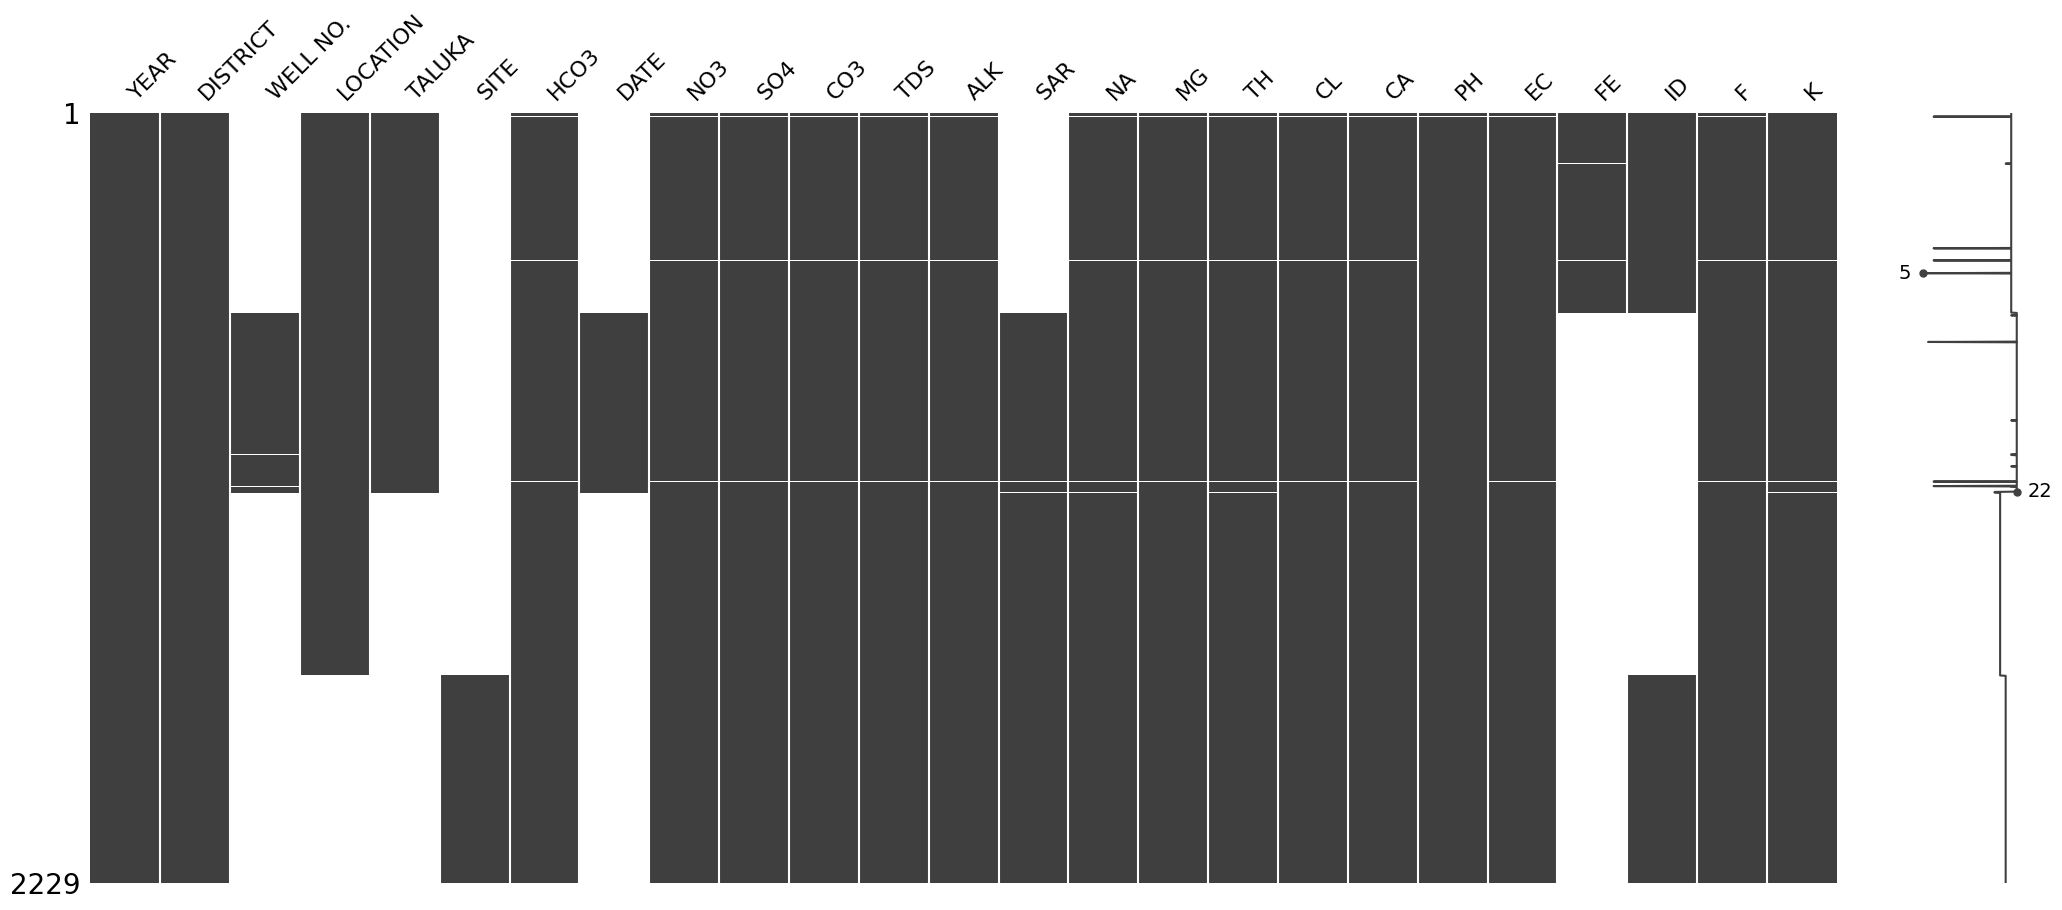

In [8]:
import missingno as mno

mno.matrix(super_data)

In [9]:
super_data.to_csv('refined-data/super_data.csv', index=False)

Making the Super Data

In [27]:
import pandas as pd
import os

# Folder path containing the CSV files
folder_path = './refined-data/'

# List of CSV files in the folder
csv_files = [file for file in os.listdir(folder_path) if file.endswith('.csv')]

# Empty list to store DataFrames
dataframes = []

# Step 1: Read each CSV file into a DataFrame, rename the column, and capitalize column names
for csv_file in csv_files:
    file_path = os.path.join(folder_path, csv_file)
    df = pd.read_csv(file_path)
    
    # Rename 'Site' or 'Site Name' column to 'LOCATION'
    if 'Site' in df.columns:
        df.rename(columns={'Site': 'LOCATION'}, inplace=True)
    elif 'Site Name' in df.columns:
        df.rename(columns={'Site Name': 'LOCATION'}, inplace=True)
    
    # Capitalize column names
    df.columns = map(str.upper, df.columns)
    
    # Write the modified DataFrame back to the CSV file, overwriting the original
    df.to_csv(file_path, index=False)

Date column drop

In [3]:
import pandas as pd

super_data = pd.read_csv('./refined-data/super_data.csv')
super_data.head()

,YEAR,LONGITUDE,WELL NO.,LATITUDE,DISTRICT,LOCATION,TALUKA,SITE,HCO3,DATE,...,TH,EC,PH,CA,ID,MG,NA,FE,K,F
0,2017,NaN,NaN,NaN,Ahmedabad,Barvala,BARWALA,NaN,891.0,NaN,...,450.0,5090.0,8.25,80.0,1.0,60.0,937.0,0.033,0.3,2.80
1,2017,NaN,NaN,NaN,Ahmedabad,Dhandhuka1,DHANDHUKA,NaN,1013.0,NaN,...,1300.0,14210.0,8.23,180.0,2.0,207.0,3220.0,0.641,9.9,6.64
2,2017,NaN,NaN,NaN,Ahmedabad,Endla,VIRAMGAM,NaN,305.0,NaN,...,220.0,685.0,8.17,52.0,3.0,22.0,49.0,0,13.6,0.44
3,2017,NaN,NaN,NaN,Ahmedabad,Kumarkhan,VIRAMGAM,NaN,988.0,NaN,...,800.0,10660.0,8.19,140.0,4.0,109.0,1875.0,0.082,7.2,11.20
4,2017,NaN,NaN,NaN,Ahmedabad,Kundali,RANPUR,NaN,305.0,NaN,...,280.0,1300.0,8.03,64.0,5.0,29.0,210.0,0,3.7,0.50


In [4]:
super_data.drop(['DATE'], axis=1, inplace=True)
super_data.columns

Index(['YEAR', 'LONGITUDE', 'WELL NO.', 'LATITUDE', 'DISTRICT', 'LOCATION',
       'TALUKA', 'SITE', 'HCO3', 'SIO2', 'CO3', 'NO3', 'SO4', 'SAR', 'ALK',
       'TDS', 'CL', 'TH', 'EC', 'PH', 'CA', 'ID', 'MG', 'NA', 'FE', 'K', 'F'],
      dtype='object')

In [5]:
super_data.to_csv('./refined-data/super_data.csv', index=False)